In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\weatherHistory.csv\weatherHistory.csv")

In [3]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Formatted Date', inplace = True)

In [7]:
data = df[['Temperature (C)']]

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [11]:
window_size = 30
X, y =create_sequences(scaled_data, window_size)

In [12]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [13]:
def build_lstm():
    model = Sequential([
        LSTM(64, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [14]:
def build_gru():
    model = Sequential([
        GRU(64, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [15]:
print("Training LSTM...")
lstm_model = build_lstm()
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Training LSTM...


C:\Users\admin\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0068 - val_loss: 4.7983e-04
Epoch 2/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.9595e-04 - val_loss: 3.9106e-04
Epoch 3/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 5.5291e-04 - val_loss: 3.7631e-04
Epoch 4/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4.9719e-04 - val_loss: 3.7876e-04
Epoch 5/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 4.9504e-04 - val_loss: 3.3622e-04


In [16]:
print("\nTraining GRU...")
gru_model = build_gru()
gru_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Training GRU...
Epoch 1/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0094 - val_loss: 5.9704e-04
Epoch 2/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 6.2705e-04 - val_loss: 3.8495e-04
Epoch 3/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 5.6447e-04 - val_loss: 3.8823e-04
Epoch 4/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.6369e-04 - val_loss: 3.7157e-04
Epoch 5/5
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.0901e-04 - val_loss: 4.4999e-04


In [17]:
lstm_preds = lstm_model.predict(X_test)
gru_preds = gru_model.predict(X_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
lstm_preds = scaler.inverse_transform(lstm_preds)
gru_preds = scaler.inverse_transform(gru_preds)
y_true = scaler.inverse_transform(y_test)

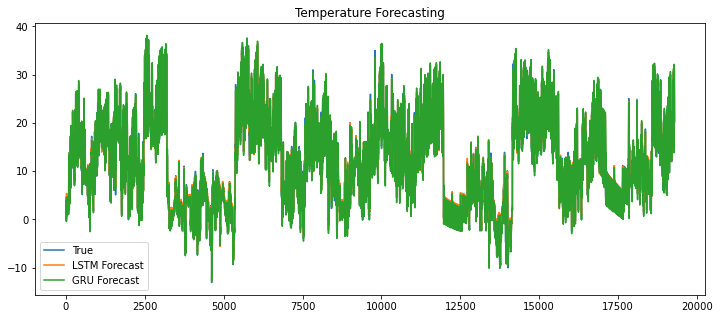

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='True')
plt.plot(lstm_preds, label='LSTM Forecast')
plt.plot(gru_preds, label='GRU Forecast')
plt.title("Temperature Forecasting")
plt.legend()
plt.show()